In [ ]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

def upload_image():
    print("Please upload an image (.jpg, .png, or .tif)")
    uploaded = files.upload()
    if not uploaded:
        raise ValueError("No file uploaded")

    input_file = list(uploaded.keys())[0]
    if not input_file.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')):
        raise ValueError("Unsupported file format. Use .jpg, .png, or .tif")

    img = cv2.imread(input_file)
    if img is None:
        raise ValueError(f"Failed to load image: {input_file}")

    return img, input_file

In [ ]:
def display_image(img, title, cmap=None):
    plt.figure(figsize=(8,6))
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


In [ ]:
def process_and_display_image(img):
    # Original
    display_image(img, "Uploaded Image")
    print("Image loaded into memory.")

    # Brightness & Contrast adjustment
    img = np.clip(1.2 * img + 20, 0, 255).astype(np.uint8)
    display_image(img, "Brightness and Contrast Adjusted")
    print("Brightness and contrast adjusted.")

    # Gaussian Blur
    img = cv2.GaussianBlur(img, (5, 5), 0)
    display_image(img, "Gaussian Blur")
    print("Gaussian blur applied.")

    # Non-local Means Denoising
    img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
    display_image(img, "Non-local Means Denoised")
    print("Denoising applied.")

    # Canny Edge Detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    display_image(edges, "Canny Edges", cmap='gray')
    print("Canny edge detection applied.")

    return img  # Return processed image if needed


In [ ]:
def orb_feature_detection(input_file):
    try:
        original_img = cv2.imread(input_file)
        if original_img is None:
            raise ValueError(f"Failed to reload original image: {input_file}")

        gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

        orb = cv2.ORB_create(nfeatures=1000)
        keypoints, descriptors = orb.detectAndCompute(gray, None)

        orb_img = cv2.drawKeypoints(original_img, keypoints, None, color=(0, 255, 0), flags=0)
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(orb_img, cv2.COLOR_BGR2RGB))
        plt.title(f"ORB Feature Keypoints (Detected: {len(keypoints)})")
        plt.axis('off')
        plt.show()

        print(f"ORB detected {len(keypoints)} keypoints.")
    except Exception as e:
        print(f"Error in ORB feature extraction: {str(e)}")

Please upload an image (.jpg, .png, or .tif)


Saving istockphoto-1368965646-612x612.jpg to istockphoto-1368965646-612x612 (2).jpg


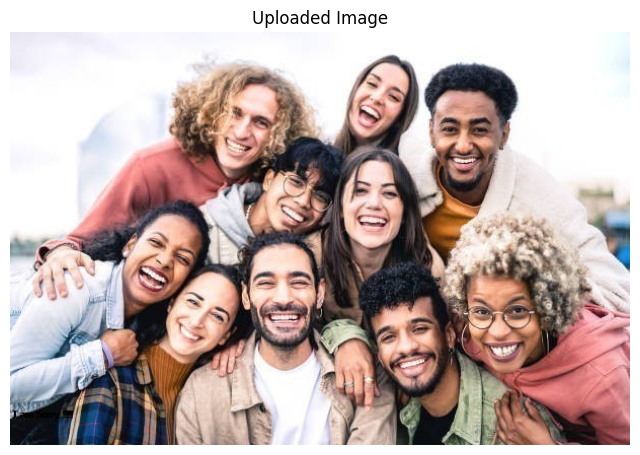

Image loaded into memory.


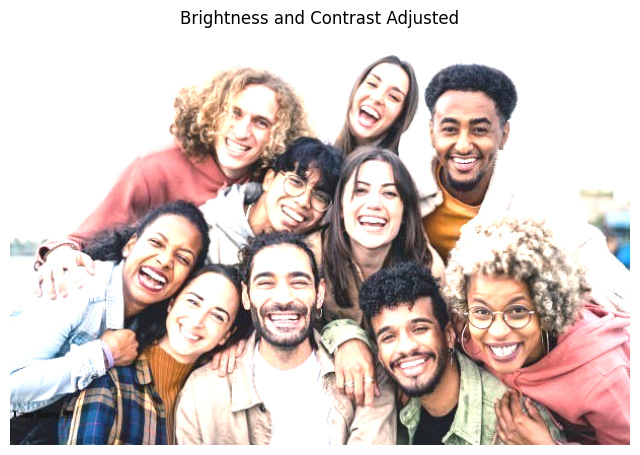

Brightness and contrast adjusted.


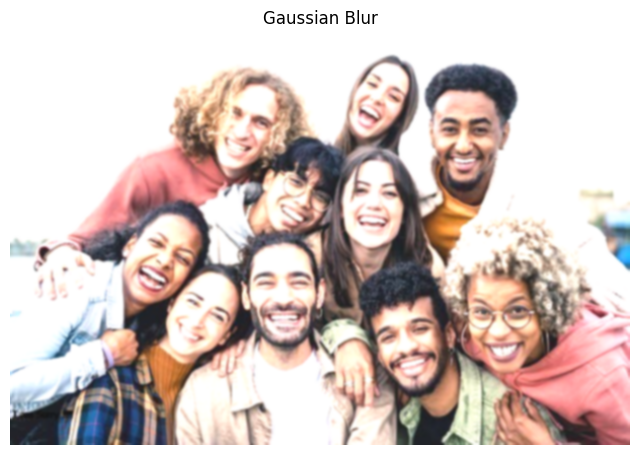

Gaussian blur applied.


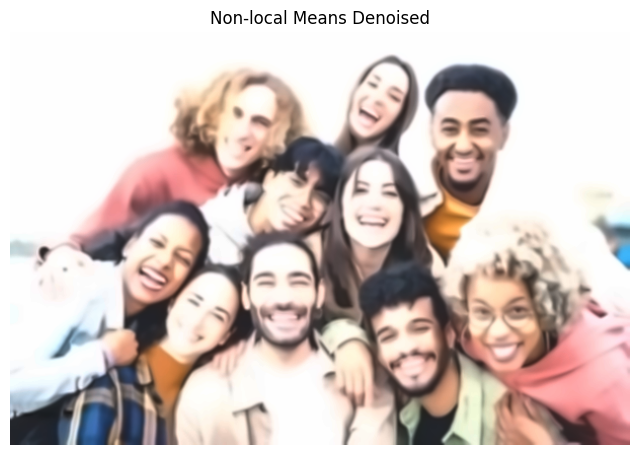

Denoising applied.


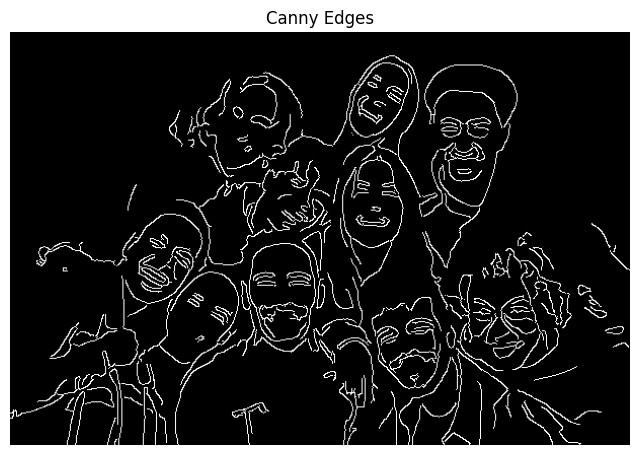

Canny edge detection applied.


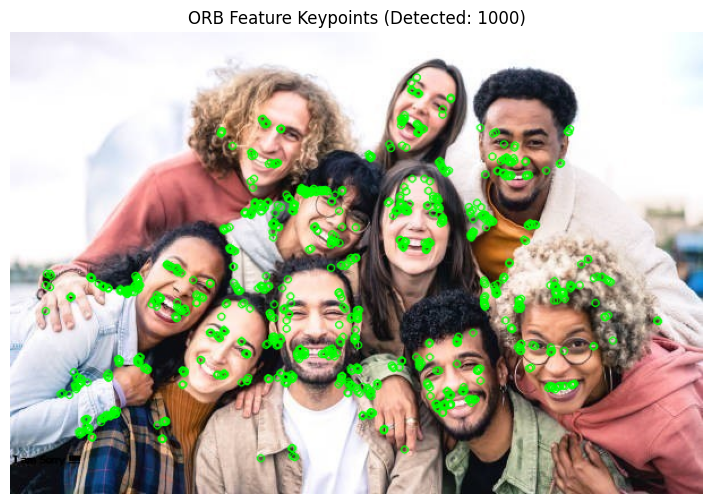

ORB detected 1000 keypoints.


In [ ]:
def main():
    try:
        img, input_file = upload_image()
        processed_img = process_and_display_image(img)
        orb_feature_detection(input_file)
    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()


In [ ]:
# Download all processed images
try:
    !zip -r processed_images.zip processed_images
    files.download('processed_images.zip')
except Exception as e:
    print(f"Error downloading images: {str(e)}")

	zip warning: name not matched: processed_images

zip error: Nothing to do! (try: zip -r processed_images.zip . -i processed_images)
Error downloading images: Cannot find file: processed_images.zip
